In [1]:
import pandas as pd
import sklearn.model_selection
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
def load_data(filename):
    return pd.read_csv(filename)

In [3]:
def cleanup(car_data):
    car_data.loc[car_data.car_price == 'vhigh', 'car_price'] = 4
    car_data.loc[car_data.car_price == 'high', 'car_price'] = 3
    car_data.loc[car_data.car_price == 'med', 'car_price'] = 2
    car_data.loc[car_data.car_price == 'low', 'car_price'] = 1
    
    car_data.loc[car_data.car_maintenance_cost == 'vhigh', 'car_maintenance_cost'] = 4
    car_data.loc[car_data.car_maintenance_cost == 'high', 'car_maintenance_cost'] = 3
    car_data.loc[car_data.car_maintenance_cost == 'med', 'car_maintenance_cost'] = 2
    car_data.loc[car_data.car_maintenance_cost == 'low', 'car_maintenance_cost'] = 1
    
    car_data.loc[car_data.car_doors == '5more', 'car_doors'] = 5  #Note That I cleaned this
    
    car_data.loc[car_data.car_capacity == 'more', 'car_capacity'] = 10 #Note That I cleaned this
    
    car_data.loc[car_data.car_luggage_capacity == 'small', 'car_luggage_capacity'] = 1
    car_data.loc[car_data.car_luggage_capacity == 'med', 'car_luggage_capacity'] = 2
    car_data.loc[car_data.car_luggage_capacity == 'big', 'car_luggage_capacity'] = 3
    
    car_data.loc[car_data.car_safety == 'low', 'car_safety'] = 1
    car_data.loc[car_data.car_safety == 'med', 'car_safety'] = 2
    car_data.loc[car_data.car_safety == 'high', 'car_safety'] = 3
    
    car_data.loc[car_data.decision == 'unacc', 'decision'] = 1
    car_data.loc[car_data.decision == 'acc', 'decision'] = 2
    car_data.loc[car_data.decision == 'good', 'decision'] = 3
    car_data.loc[car_data.decision == 'vgood', 'decision'] = 4
    
    #dfa = pd.DataFrame(car_data)
    #dfa.to_csv(r'E:\School\San Jose\Fall 2021\CMPE 255\LA Decision Trees\data.csv') Prints data to see visual

In [4]:
def inspect_data(car_data):
    print("Unique Count: ")
    print(car_data.nunique())
    print("\nCount: ")
    print(car_data.count())
    print("\nFrequency: ")
    print(car_data['car_price'].value_counts())
    print(car_data['car_maintenance_cost'].value_counts())
    print(car_data['car_doors'].value_counts())    
    print(car_data['car_capacity'].value_counts())
    print(car_data['car_luggage_capacity'].value_counts())
    print(car_data['car_safety'].value_counts())
    print(car_data['decision'].value_counts())        

In [5]:
def prep_training(car_data):
    X = car_data.iloc[:,:6]
    y = car_data.iloc[:, 6]
    
    print("Shape of x: ", X.shape)
    print("Shape of y: ", y.shape)

    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=101)
    return X_train, X_test, y_train, y_test

In [6]:
# Perform following task for Decision tree
def decision_tree(X_train, y_train, X_test, y_test):
    clf = tree.DecisionTreeClassifier() #  1. create a model
    y_train = y_train.astype('int')     
    clf = clf.fit(X_train, y_train)     #  2. feed training data into the model
    y_pred = clf.predict(X_test)        #  3. predict values for your test data
    text = tree.export_text(clf)        #  4. visualize classifier
    print(text)
    
    result = confusion_matrix(list(y_test.values), y_pred)
    print(result)                       #  5. find the training and testing accuracy
    acc = accuracy_score(list(y_test.values), y_pred)
    print("Accuracy: ", acc)

In [7]:
def classifier(clf, X_train, y_train, X_test, y_test, depth):
    clf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Depth: ", depth)
    plt.figure(figsize = (16 ,depth))
    tree.plot_tree(clf, filled = True)

In [8]:
def tree_depth(X_train, y_train, X_test, y_test):
    y_train = y_train.astype('int')
    clf2 = tree.DecisionTreeClassifier(max_depth = 2)  # 1. Decision Trees with max_depth = 2
    classifier(clf2, X_train, y_train, X_test, y_test, 2)
    clf4 = tree.DecisionTreeClassifier(max_depth = 4)  # 2. Decision Trees with max_depth = 4
    classifier(clf4, X_train, y_train, X_test, y_test, 4)
    clf6 = tree.DecisionTreeClassifier(max_depth = 6)  # 3. Decision Trees with max_depth = 6
    classifier(clf6, X_train, y_train, X_test, y_test, 6)
    clf8 = tree.DecisionTreeClassifier(max_depth = 8)  # 4. Decision Trees with max_depth = 8
    classifier(clf8, X_train, y_train, X_test, y_test, 8)
    clf10 = tree.DecisionTreeClassifier(max_depth = 10) # 5. Decision Trees with max_depth = 10
    classifier(clf10, X_train, y_train, X_test, y_test, 10)
    clf12 = tree.DecisionTreeClassifier(max_depth = 12) # 6. Decision Trees with max_depth = 12
    classifier(clf12, X_train, y_train, X_test, y_test, 12)
    

In [9]:
car_data = load_data('evaluation.csv')

def main():
    inspect_data(car_data)
    cleanup(car_data)

In [10]:
def data():
    X_train, X_test, y_train, y_test = prep_training(car_data)
    print("\n")
    decision_tree(X_train, y_train, X_test, y_test)
    print("\n")

In [11]:
def depth():
    X_train, X_test, y_train, y_test = prep_training(car_data)
    tree_depth(X_train, y_train, X_test, y_test)

In [12]:
main()

Unique Count: 
car_price               4
car_maintenance_cost    4
car_doors               4
car_capacity            3
car_luggage_capacity    3
car_safety              3
decision                4
dtype: int64

Count: 
car_price               1728
car_maintenance_cost    1728
car_doors               1728
car_capacity            1728
car_luggage_capacity    1728
car_safety              1728
decision                1728
dtype: int64

Frequency: 
med      432
low      432
high     432
vhigh    432
Name: car_price, dtype: int64
med      432
low      432
high     432
vhigh    432
Name: car_maintenance_cost, dtype: int64
4        432
2        432
5more    432
3        432
Name: car_doors, dtype: int64
4       576
2       576
more    576
Name: car_capacity, dtype: int64
small    576
med      576
big      576
Name: car_luggage_capacity, dtype: int64
med     576
low     576
high    576
Name: car_safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: decision, dtype: 

In [13]:
data()

Shape of x:  (1728, 6)
Shape of y:  (1728,)


|--- feature_5 <= 1.50
|   |--- class: 1
|--- feature_5 >  1.50
|   |--- feature_3 <= 3.00
|   |   |--- class: 1
|   |--- feature_3 >  3.00
|   |   |--- feature_0 <= 2.50
|   |   |   |--- feature_1 <= 2.50
|   |   |   |   |--- feature_5 <= 2.50
|   |   |   |   |   |--- feature_4 <= 1.50
|   |   |   |   |   |   |--- feature_2 <= 2.50
|   |   |   |   |   |   |   |--- feature_3 <= 7.00
|   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |--- feature_3 >  7.00
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_2 >  2.50
|   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |--- feature_4 >  1.50
|   |   |   |   |   |   |--- feature_0 <= 1.50
|   |   |   |   |   |   |   |--- feature_2 <= 3.50
|   |   |   |   |   |   |   |   |--- feature_4 <= 2.50
|   |   |   |   |   |   |   |   |   |--- feature_3 <= 7.00
|   |   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |  

Shape of x:  (1728, 6)
Shape of y:  (1728,)
Depth:  2
Depth:  4
Depth:  6
Depth:  8
Depth:  10
Depth:  12


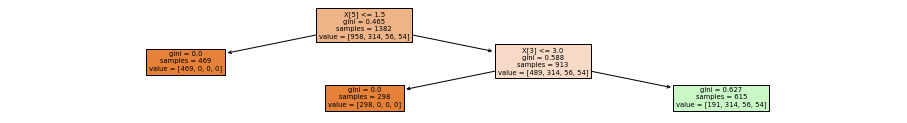

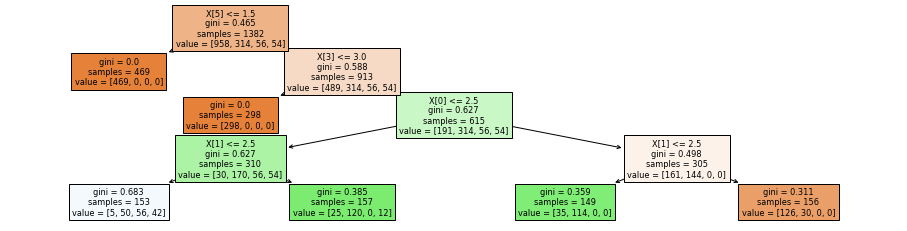

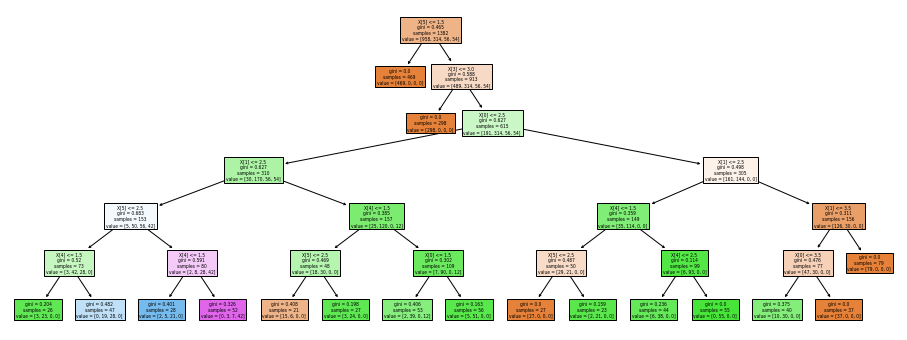

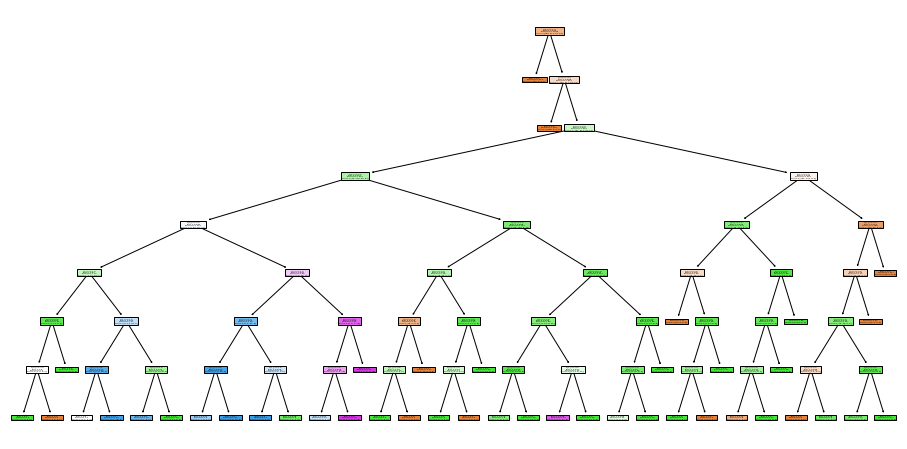

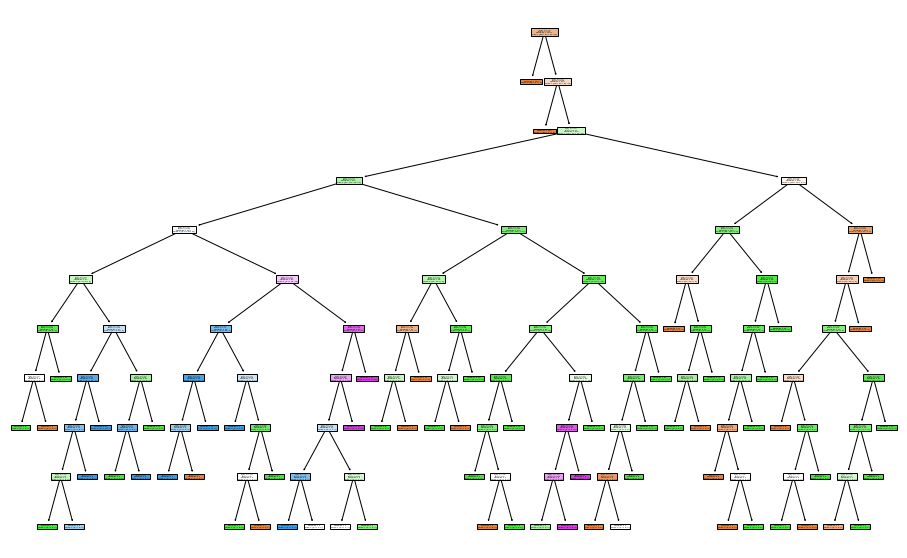

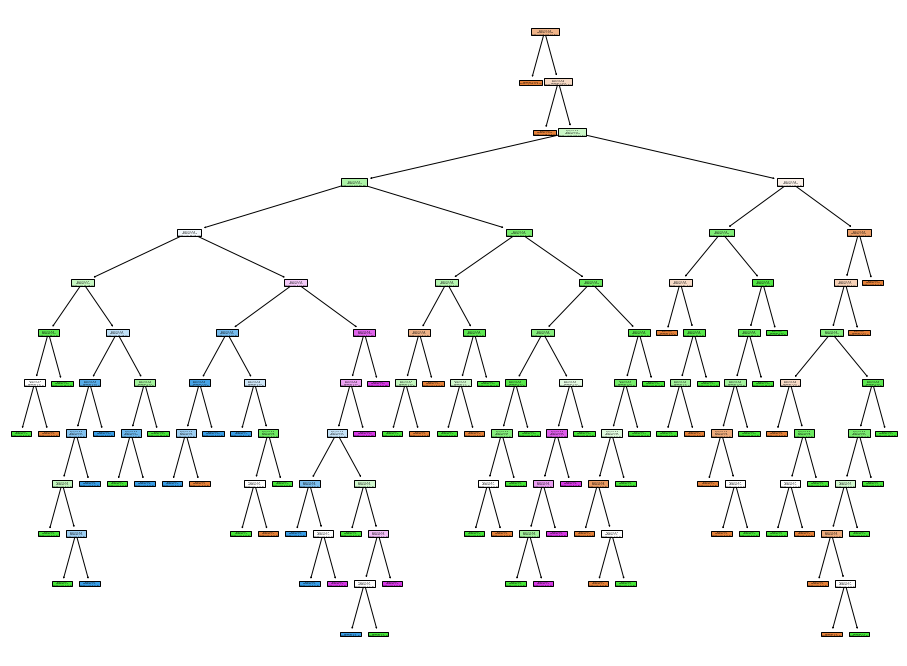

In [14]:
depth()